# Задание 1

**1. Смоделировать 4 выборки объемом 1000 из разных законов распределения:**
- нормальное, 
- экспоненциальное, 
- равномерное,
- логарифмическое.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [58]:
normal_distribut = stats.norm(scale=1)
normal = normal_distribut.rvs(size=1000)

expo_distribut = stats.expon(scale=1)
expo = expo_distribut.rvs(size=1000)

unif_distribut = stats.uniform(scale=1)
unif = unif_distribut.rvs(size=1000)

logg_distribut = stats.lognorm(s=0.99,scale=1)
logg = logg_distribut.rvs(size=1000)

**2. Для каждой выборки необходимо:**

a. нарисовать гистограмму до преобразования;

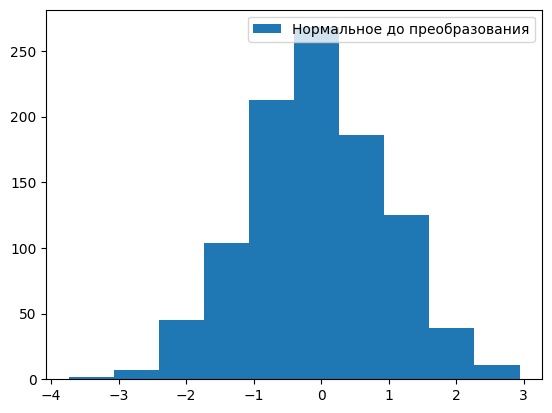

In [59]:
plt.hist(normal, label='Нормальное до преобразования')
plt.legend();

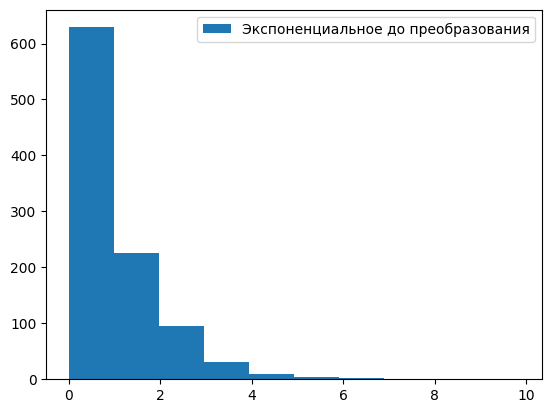

In [60]:
plt.hist(expo, label='Экспоненциальное до преобразования')
plt.legend();

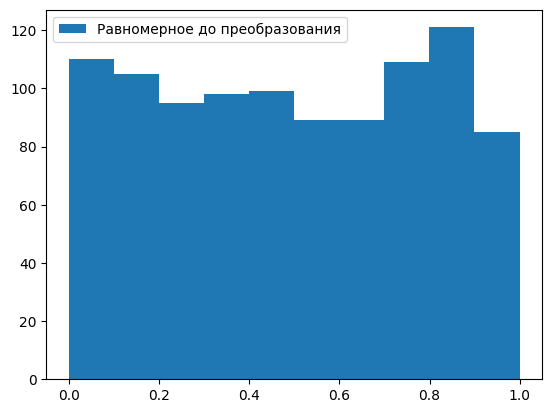

In [61]:
plt.hist(unif, label='Равномерное до преобразования')
plt.legend();

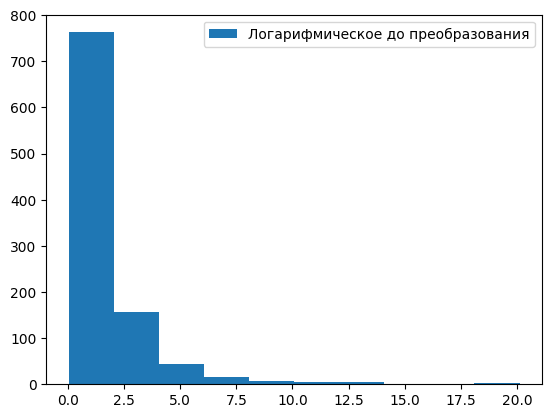

In [62]:
plt.hist(logg, label='Логарифмическое до преобразования')
plt.legend();

b. сделать масштабирование на основе Z-оценки, нарисовать гистограмму полученных значений;

In [63]:
normal.reshape(-1, 1)
expo.reshape(-1, 1)
unif.reshape(-1, 1)
logg.reshape(-1, 1)
print()

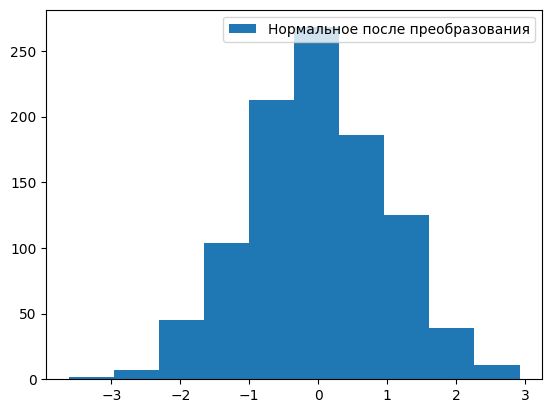

In [64]:
scaler = StandardScaler()
scaled_data_z = scaler.fit_transform(normal.reshape(-1, 1))
plt.hist(scaled_data_z, label='Нормальное после преобразования')
plt.legend()

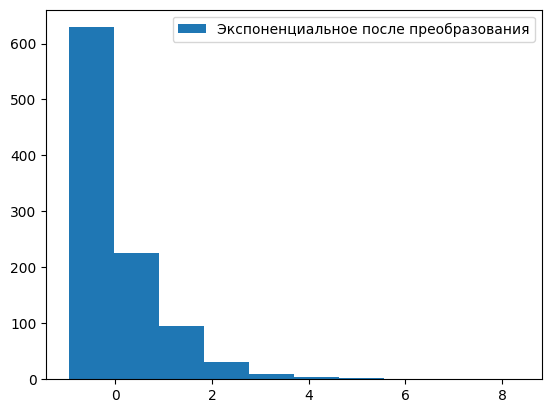

In [65]:
scaler = StandardScaler()
scaled_data_z = scaler.fit_transform(expo.reshape(-1, 1))
plt.hist(scaled_data_z, label='Экспоненциальное после преобразования')
plt.legend()

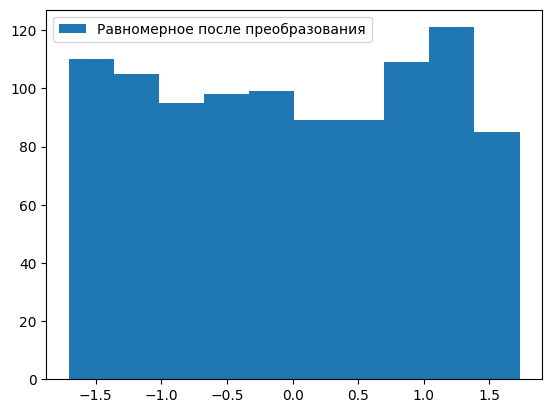

In [66]:
scaler = StandardScaler()
scaled_data_z = scaler.fit_transform(unif.reshape(-1, 1))
plt.hist(scaled_data_z, label='Равномерное после преобразования')
plt.legend()

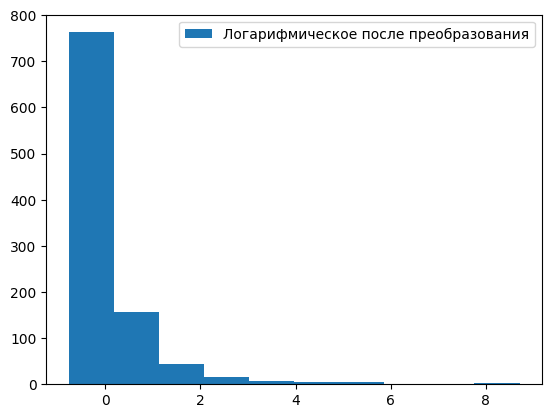

In [67]:
scaler = StandardScaler()
scaled_data_z = scaler.fit_transform(logg.reshape(-1, 1))
plt.hist(scaled_data_z, label='Логарифмическое после преобразования')
plt.legend()

c. сделать MinMax-масштабирование данных, нарисовать гистограмму полученных значений. 

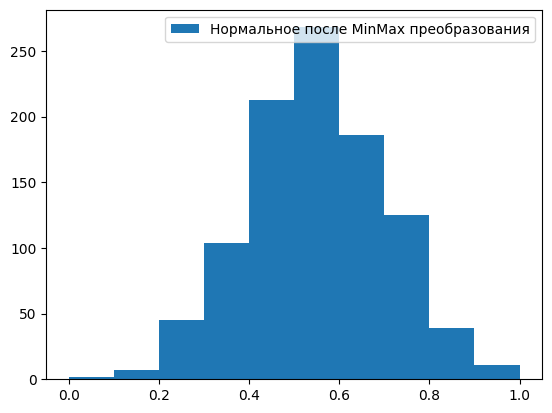

In [68]:
scaler = MinMaxScaler()
scaled_data_z = scaler.fit_transform(normal.reshape(-1, 1))
plt.hist(scaled_data_z, label='Нормальное после MinMax преобразования')
plt.legend()

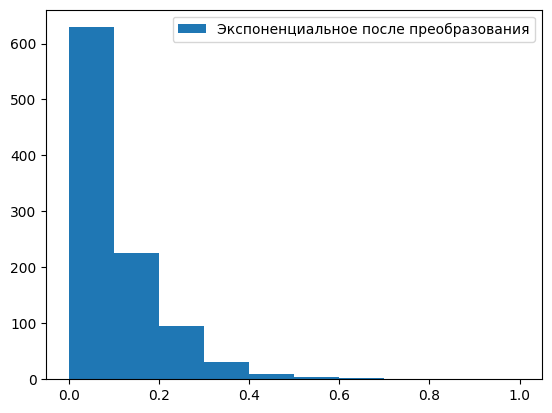

In [69]:
scaler = MinMaxScaler()
scaled_data_z = scaler.fit_transform(expo.reshape(-1, 1))
plt.hist(scaled_data_z, label='Экспоненциальное после преобразования')
plt.legend()

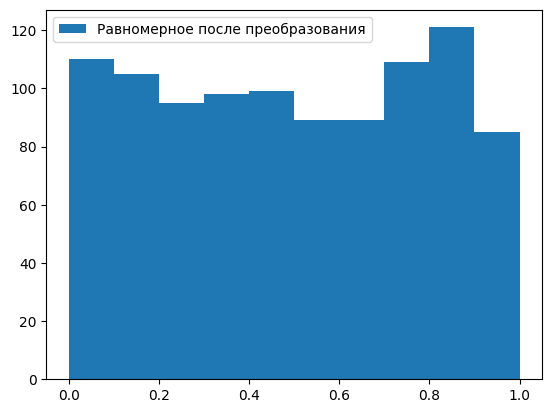

In [70]:
scaler = MinMaxScaler()
scaled_data_z = scaler.fit_transform(unif.reshape(-1, 1))
plt.hist(scaled_data_z, label='Равномерное после преобразования')
plt.legend()

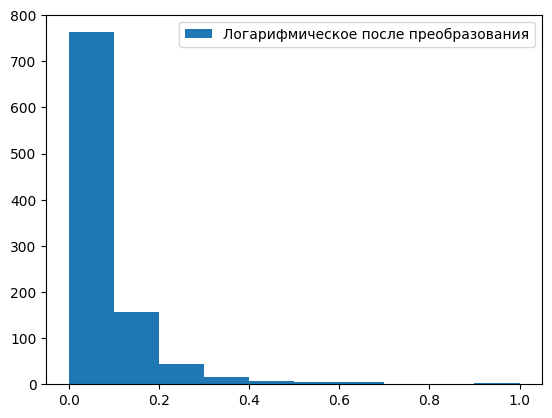

In [71]:
scaler = MinMaxScaler()
scaled_data_z = scaler.fit_transform(logg.reshape(-1, 1))
plt.hist(scaled_data_z, label='Логарифмическое после преобразования')
plt.legend()

# Задание 2

1. Загрузить файл titanic.csv.

In [72]:
df = pd.read_csv('titanic.csv', delimiter=',')

2. Вывести первые 5 строк набора данных.

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. С помощью describe() и info() вывести основную информацию.

In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


4. Указать в качестве индекса столбец PassengerId.

In [76]:
df.set_index('PassengerId',inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


5. Оставить колонки Age, Fare, Pclass, Sex, Embarked, Survived.

In [77]:
select_col = ['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Survived']
df = df[select_col]
df

,Age,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,
1,22.0,7.2500,3,male,S,0
2,38.0,71.2833,1,female,C,1
3,26.0,7.9250,3,female,S,1
4,35.0,53.1000,1,female,S,1
5,35.0,8.0500,3,male,S,0
...,...,...,...,...,...,...
887,27.0,13.0000,2,male,S,0
888,19.0,30.0000,1,female,S,1
889,NaN,23.4500,3,female,S,0


6. Заполнить пропуски.

In [78]:
df.isnull().sum()

Age         177
Fare          0
Pclass        0
Sex           0
Embarked      2
Survived      0
dtype: int64

In [79]:
imputer = SimpleImputer(strategy='mean')
df[['Age']] = imputer.fit_transform(df[['Age']])

imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])
df.head(10)

,Age,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,
1,22.000000,7.2500,3,male,S,0
2,38.000000,71.2833,1,female,C,1
3,26.000000,7.9250,3,female,S,1
4,35.000000,53.1000,1,female,S,1
5,35.000000,8.0500,3,male,S,0
6,29.699118,8.4583,3,male,Q,0
7,54.000000,51.8625,1,male,S,0
8,2.000000,21.0750,3,male,S,0
9,27.000000,11.1333,3,female,S,1


7. У колонок Age и Fare сделать масштабирование на основе Z-оценки.

In [80]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df.head(10)

,Age,Fare,Pclass,Sex,Embarked,Survived
PassengerId,,,,,,
1,-0.592481,-0.502445,3,male,S,0
2,0.638789,0.786845,1,female,C,1
3,-0.284663,-0.488854,3,female,S,1
4,0.407926,0.420730,1,female,S,1
5,0.407926,-0.486337,3,male,S,0
6,0.000000,-0.478116,3,male,Q,0
7,1.870059,0.395814,1,male,S,0
8,-2.131568,-0.224083,3,male,S,0
9,-0.207709,-0.424256,3,female,S,1


8. Преобразовать категориальные колонки с помощью OneHotEncoding, удаляя первый столбец после кодирования.

In [85]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

encoded_cols = encoder.fit_transform(df[['Sex', 'Embarked']])

encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
encoded_df

,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,1.0
1,0.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,1.0,0.0,1.0
...,...,...,...
886,1.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [86]:
new_df = pd.concat([df, encoded_df.set_index(df.index)], axis=1)
new_df.head(10)

,Age,Fare,Pclass,Sex,Embarked,Survived,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,-0.592481,-0.502445,3,male,S,0,1.0,0.0,1.0
2,0.638789,0.786845,1,female,C,1,0.0,0.0,0.0
3,-0.284663,-0.488854,3,female,S,1,0.0,0.0,1.0
4,0.407926,0.420730,1,female,S,1,0.0,0.0,1.0
5,0.407926,-0.486337,3,male,S,0,1.0,0.0,1.0
6,0.000000,-0.478116,3,male,Q,0,1.0,1.0,0.0
7,1.870059,0.395814,1,male,S,0,1.0,0.0,1.0
8,-2.131568,-0.224083,3,male,S,0,1.0,0.0,1.0
9,-0.207709,-0.424256,3,female,S,1,0.0,0.0,1.0


In [90]:
new_df = new_df.drop(["Sex", "Embarked"], axis=1)

9. Показать итоговый набор данных после преобразований.

In [91]:
new_df

,Age,Fare,Pclass,Survived,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,-0.592481,-0.502445,3,0,1.0,0.0,1.0
2,0.638789,0.786845,1,1,0.0,0.0,0.0
3,-0.284663,-0.488854,3,1,0.0,0.0,1.0
4,0.407926,0.420730,1,1,0.0,0.0,1.0
5,0.407926,-0.486337,3,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
887,-0.207709,-0.386671,2,0,1.0,0.0,1.0
888,-0.823344,-0.044381,1,1,0.0,0.0,1.0
889,0.000000,-0.176263,3,0,0.0,0.0,1.0


In [92]:
new_df.to_csv('titanic_new.csv', index=False)